# Clustering MD frames

Given thousands of MD snapshots, how do we divide them into clusters and pick representative snapshots for each cluster?

From the clustering, we need to know:
 
 * the centroids
 * weight

## Clustering at a glance

### Kmeans - cluster points in Euclidean space

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

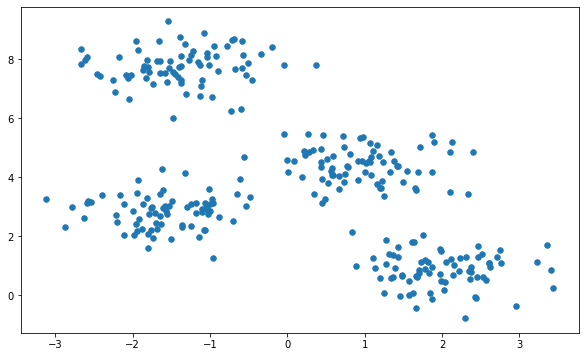

In [198]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=30);

In [201]:
# Use kmeans clustering when we have coordinates
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

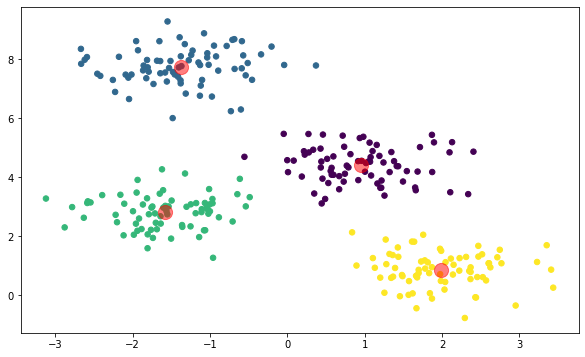

In [202]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

**Conclusions:** Kmeans is very reliable way to cluster points with known coordinates

### Hierachical clustering - cluster points based on distance matrix

While distance matrix can be derived from points in Euclidean space, points can not be derived from the distance matrix in general. This is because distances do not have to constrain points in 3D space. That is, the dimension that satisfies the distance matrix is unknown. 

In [204]:
# Use hierarchical clustering when we have distance matrix
from sklearn.metrics.pairwise import euclidean_distances
dmatrix = euclidean_distances(X, X)
print(dmatrix)
print(dmatrix.shape)

[[0.         5.73342212 2.98031163 ... 2.43233046 5.67402792 2.69892301]
 [5.73342212 0.         3.4547386  ... 3.41912636 1.82348709 4.67524398]
 [2.98031163 3.4547386  0.         ... 0.91143931 2.80383259 3.76896962]
 ...
 [2.43233046 3.41912636 0.91143931 ... 0.         3.25591848 2.85755514]
 [5.67402792 1.82348709 2.80383259 ... 3.25591848 0.         5.48504557]
 [2.69892301 4.67524398 3.76896962 ... 2.85755514 5.48504557 0.        ]]
(300, 300)


In [224]:
import scipy.spatial.distance as ssd
distArray = ssd.squareform(dmatrix, checks=False) 
import scipy.cluster.hierarchy as hcl
Z = hcl.linkage(distArray)

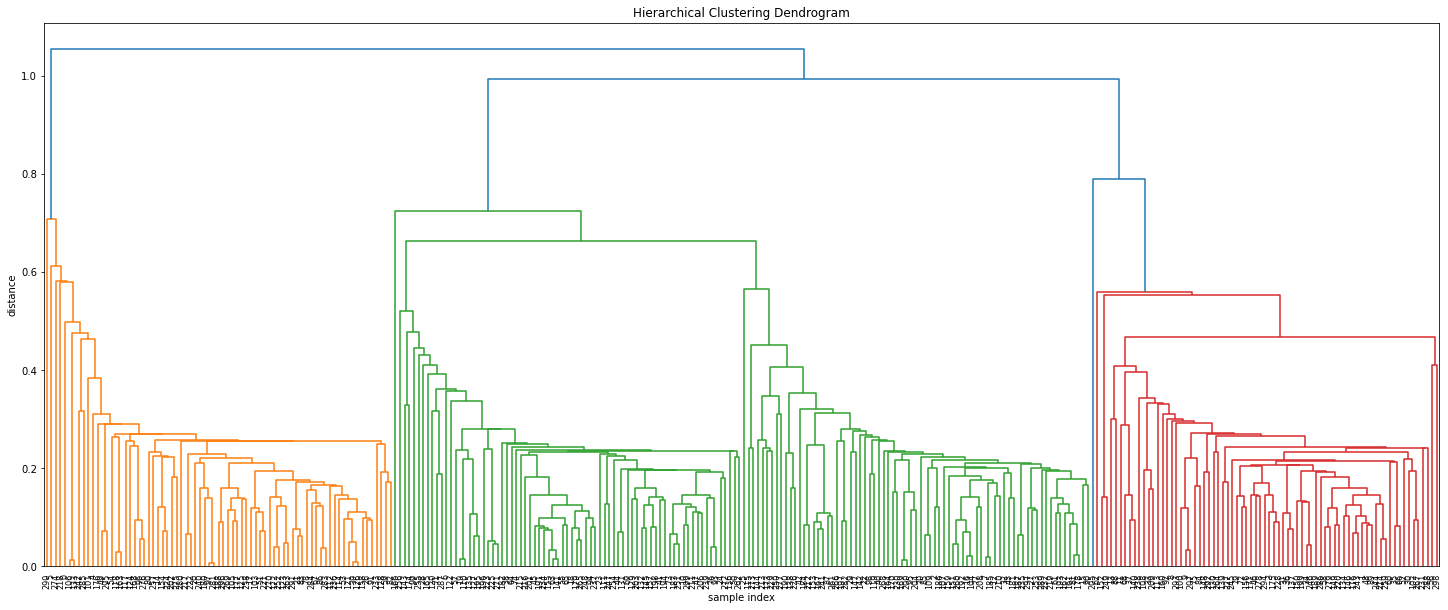

In [225]:
# Visualize dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hcl.dendrogram(
    Z,
    #truncate_mode='lastp',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [228]:
max_d = 0.8
clusters = hcl.fcluster(Z, max_d, criterion='distance')
clusters

array([1, 3, 2, 3, 1, 1, 2, 2, 3, 3, 2, 3, 2, 3, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 2, 2,
       3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 2, 1, 1, 3, 2, 1, 2,
       3, 3, 2, 1, 3, 2, 2, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 3, 2,
       2, 2, 1, 3, 1, 2, 3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2,
       1, 2, 3, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 3,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2,
       3, 1, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2,
       1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1,
       3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 1,
       3, 2, 3, 2, 1, 1, 3, 3, 3, 1, 1, 2, 3, 2], d

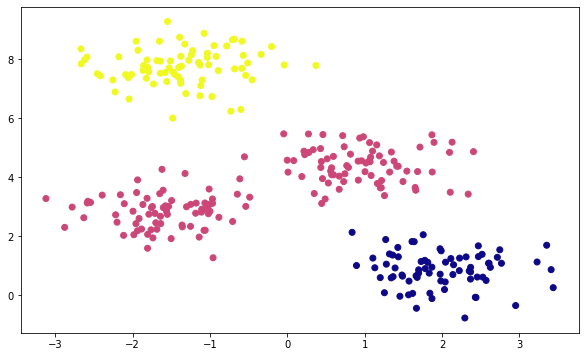

In [229]:
# visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='plasma')  # plot points with cluster dependent colors
plt.show()

We ended up with 6 clusters. Four of them are good, but there are some outliers.

**Conclusions:** Even though we started with good clusters, The hirachical clustering do not produce as good clustering as we hoped.

In [104]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

### Comparison

|  | Kmeans | Hierachical |
|---|---|---|
|Method| Minimizes within-cluster variances | Links points  |
|Pros | Gives centroids | Flexible, can handle both locations and dmatrix |
|Cons | Requires locations | No centroids reported directly, linked points can be very different |


## Clustering MD frames

MD frames are to be clustered by their structural similarity rather than their absolution position of their centers or certain atom location.

The similarity can be measured in different ways, and therefore clustering techniques will be used. 

### RMSD as distance matrix

If we align two frames (CA atoms only in this work), the RMSD (minimized RMSD after alignment) measures the *average* atom distance, and can be used as an indicator of structure similarity or **distance**.

We have 5000 frames, so the distance would be a $5000\times 5000$ matrix, with the diagonal as 0 and two triagles mirrored to each other. We have to do $\frac{(5000\times 5000 - 5000)}{2} = 12,500,000$ times of alignment.

The alignment of two sets of points here is a 3D rigid transform problem. MDAnalysis module has a align and alignto function to do this.

1. Extrat atom CA from each frame and make it a pdb file under directory "frames". 

In [207]:
import sys, os, glob
frame_names = glob.glob("frames/*.pdb")
#print(frame_names)

2. Test alignment and rmsd calculation

In [209]:
# test case
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd

# get first structure as mobile structure
iframe = 0
mobile = mda.Universe(frame_names[iframe])
A = mobile.select_atoms('name CA')

# get second structure as reference structure
jframe = 1
ref = mda.Universe(frame_names[jframe])
B = ref.select_atoms('name CA')

# align
d = rmsd(A.positions, B.positions, superposition=True)
print("RMSD:", d)

# write aligned structure
print()
print("Mobile file:", frame_names[iframe])
print("Reference file:", frame_names[jframe])
print("Aligned file: aligned.pdb")
old_rmsd, new_rmsd = align.alignto(mobile, ref)
mobile.select_atoms('protein').write("aligned.pdb")
print("RMSD before alignment:", old_rmsd, "\nRMSD after alignment:", new_rmsd)

RMSD: 1.3562250043099202

Mobile file: frames/frame94_45-ca.pdb
Reference file: frames/frame58_78-ca.pdb
Aligned file: aligned.pdb
RMSD before alignment: 2.905425183040569 
RMSD after alignment: 1.3562250043099202


Original            |  Aligned
:-------------------------:|:-------------------------:
![Original](mobile.png)  |  ![Aligned](aligned.png)


3. prepare an empty matrix

In [210]:
import numpy as np
N = len(frame_names)

# Use first 300 frames for demo
N = 300

rmsd_matrix = np.zeros(shape = (N, N))
print(rmsd_matrix, rmsd_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (300, 300)


4. Align frames and compute distance matrix by rmsd

In [ ]:
# This part of code takes hours to run, skip this and use the next part to load a pre-calculated matrix

import timeit

for iframe in range(N-1):
    start_time = timeit.default_timer()

    mobile = mda.Universe(frame_names[iframe])
    A = mobile.select_atoms('name CA')
    for jframe in range(iframe+1, N):
        ref = mda.Universe(frame_names[jframe])
        B = ref.select_atoms('name CA')
        d = rmsd(A.positions, B.positions, superposition=True)
        rmsd_matrix[iframe][jframe] = d
        rmsd_matrix[jframe][iframe] = d

    elapsed = timeit.default_timer() - start_time
    print("Frame %d - *, elapsed time for align and rmsd = %d seconds" %(iframe, elapsed))    

In [212]:
print(rmsd_matrix, rmsd_matrix.shape)

[[0.         1.356225   1.20193411 ... 0.         0.         0.        ]
 [1.356225   0.         0.         ... 0.         0.         0.        ]
 [1.20193411 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] (300, 300)


In [213]:
# This part loads a pre-calculated rmsd distance matrix
rmsd_matrix2 = np.load("saved_rmsdmatrix.npy")
print(rmsd_matrix2, rmsd_matrix2.shape)

[[0.         1.356225   1.20193411 ... 1.34999998 1.36696466 1.27132347]
 [1.356225   0.         1.24523522 ... 1.08119817 1.22027809 1.33594303]
 [1.20193411 1.24523522 0.         ... 1.28996646 1.40080673 0.9347966 ]
 ...
 [1.34999998 1.08119817 1.28996646 ... 0.         1.23892263 1.40865703]
 [1.36696466 1.22027809 1.40080673 ... 1.23892263 0.         1.45827372]
 [1.27132347 1.33594303 0.9347966  ... 1.40865703 1.45827372 0.        ]] (300, 300)


4. Do the clustering

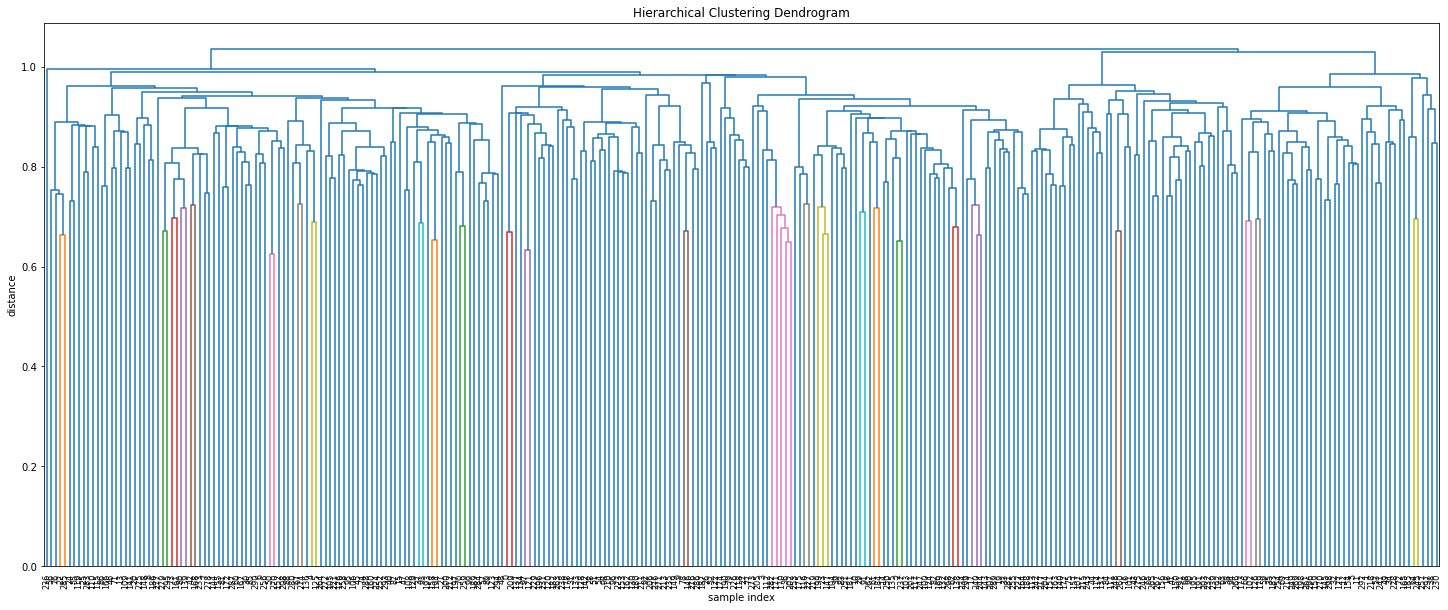

In [232]:
distArray = ssd.squareform(rmsd_matrix2, checks=False) 
Z = hcl.linkage(distArray)

# Visualize dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hcl.dendrogram(
    Z,
    #truncate_mode='lastp',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

5. Cluster results

In [236]:
max_d = 0.98
clusters = hcl.fcluster(Z, max_d, criterion='distance')
print(clusters)
print("Cluster 1:", list(clusters).count(1))
print("Cluster 2:", list(clusters).count(2))
print("Cluster 3:", list(clusters).count(3))

[2 7 4 4 1 7 1 1 1 2 4 7 7 1 4 1 6 4 6 4 1 1 1 4 1 1 3 4 2 4 1 2 7 4 7 7 4
 1 8 4 1 6 1 6 6 1 1 1 2 7 1 2 3 7 2 1 1 1 6 7 1 4 4 6 8 6 7 1 6 7 1 1 7 1
 1 6 1 4 2 4 1 1 4 4 6 1 1 1 1 1 6 4 2 1 6 1 2 2 2 1 4 6 7 4 4 1 1 6 1 1 1
 6 4 6 6 1 4 4 4 1 2 2 3 1 4 1 7 7 2 1 2 6 4 2 2 4 1 2 4 1 6 1 2 4 1 7 2 4
 1 2 6 6 1 2 7 1 6 6 1 7 1 1 2 6 4 7 1 1 1 4 4 4 1 7 4 4 1 6 2 7 2 4 2 7 4
 8 1 3 4 1 4 6 6 1 1 6 2 1 7 4 1 4 4 6 6 4 2 4 1 2 2 2 1 2 7 6 2 6 7 4 1 1
 4 2 1 1 4 4 7 2 8 2 6 1 4 2 5 4 2 6 4 7 6 6 4 8 6 4 6 7 4 4 1 4 7 4 1 8 1
 1 6 7 4 2 1 6 6 6 4 7 7 2 1 4 1 6 2 1 1 1 1 4 4 1 1 1 2 1 1 4 1 6 7 1 1 1
 7 8 7 4]
Cluster 1: 97
Cluster 2: 43
Cluster 3: 4


### Intrinsic signiture as distance matrix

In a frame, the distances between atoms make a signiture matrix. The difference of this matrix is an indicator of frame similarity. The more different the frames, the bigger the different of the matrices. By using this signiture matrix, 

* We don't need to align the two structure.
* Everything else is the same.

1. Make similarity sidtance matrix

In [216]:
# Example

# load points
pts = np.loadtxt(frame_names[0], usecols=[6, 7, 8])
# calculate get distance matrix
A = np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

pts = np.loadtxt(frame_names[1], usecols=[6, 7, 8])
B = np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

np.sqrt(np.mean((A-B)**2))


1.0649650439352036

In [ ]:
# This part of code takes 4 hours to run, skip to nest cell to load the precalculated matrix
similarity_matrix = np.zeros(shape = (N, N))

N = 300

import timeit

for iframe in range(N-1):
    start_time = timeit.default_timer()
    pts = np.loadtxt(frame_names[iframe], usecols=[6, 7, 8])
    A = np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))
    for jframe in range(iframe+1, N):
        pts = np.loadtxt(frame_names[jframe], usecols=[6, 7, 8])
        B = np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))
        d = np.sqrt(np.mean((A-B)**2))
        similarity_matrix[iframe][jframe] = d
        similarity_matrix[jframe][iframe] = d

    elapsed = timeit.default_timer() - start_time
    print("Frame %s elapsed time = %d seconds" %(iframe, elapsed))



In [217]:
# This part loads a pre-calculated similarity distance matrix
similarity_matrix2 = np.load("saved_simlaritymatrix.npy")
print(similarity_matrix2, similarity_matrix2.shape)

[[0.         1.06496504 0.93156694 ... 1.09912124 1.07123876 0.99307284]
 [1.06496504 0.         0.96538147 ... 0.83572557 0.89027527 1.02832821]
 [0.93156694 0.96538147 0.         ... 1.009575   1.0496578  0.74419806]
 ...
 [1.09912124 0.83572557 1.009575   ... 0.         0.93405392 1.11978584]
 [1.07123876 0.89027527 1.0496578  ... 0.93405392 0.         1.11289935]
 [0.99307284 1.02832821 0.74419806 ... 1.11978584 1.11289935 0.        ]] (300, 300)


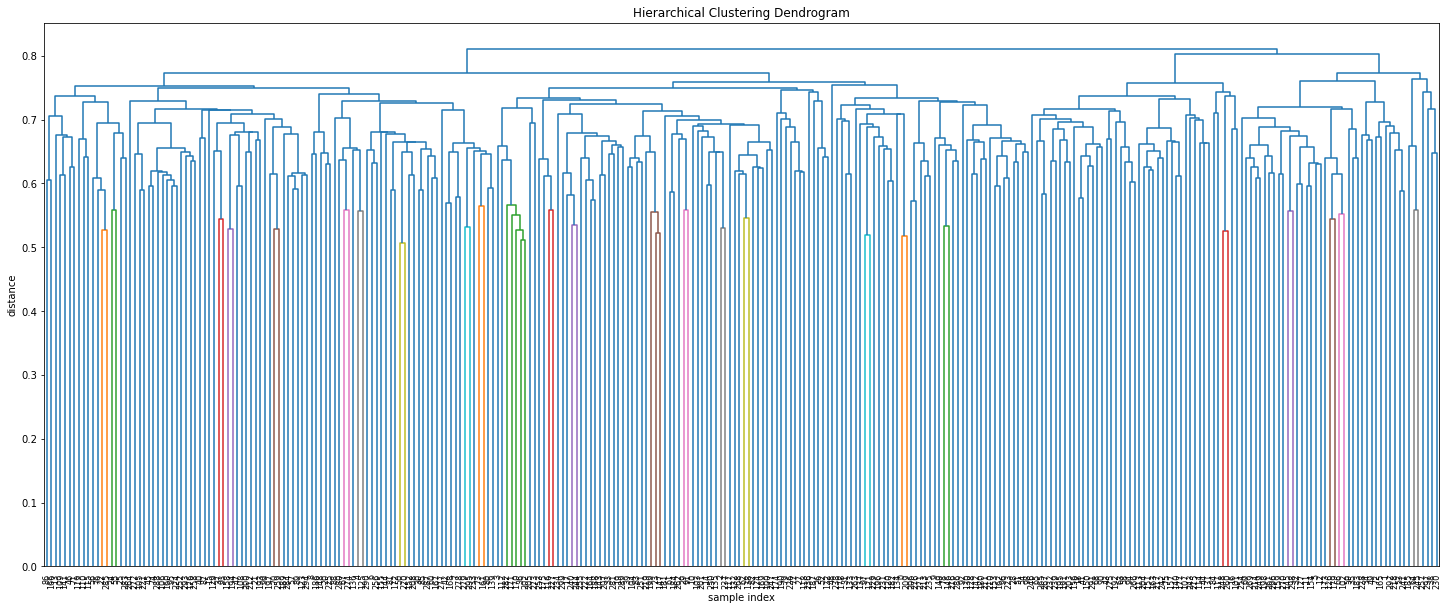

In [237]:
distArray = ssd.squareform(similarity_matrix2, checks=False) 
Z2 = hcl.linkage(distArray)

# Visualize dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hcl.dendrogram(
    Z2,
    #truncate_mode='lastp',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [240]:
max_d = 0.755
clusters2 = hcl.fcluster(Z2, max_d, criterion='distance')
print(clusters)
print(clusters2)
print("Cluster 1:", list(clusters2).count(1))
print("Cluster 2:", list(clusters2).count(2))
print("Cluster 3:", list(clusters2).count(3))
clusters == clusters2

[2 7 4 4 1 7 1 1 1 2 4 7 7 1 4 1 6 4 6 4 1 1 1 4 1 1 3 4 2 4 1 2 7 4 7 7 4
 1 8 4 1 6 1 6 6 1 1 1 2 7 1 2 3 7 2 1 1 1 6 7 1 4 4 6 8 6 7 1 6 7 1 1 7 1
 1 6 1 4 2 4 1 1 4 4 6 1 1 1 1 1 6 4 2 1 6 1 2 2 2 1 4 6 7 4 4 1 1 6 1 1 1
 6 4 6 6 1 4 4 4 1 2 2 3 1 4 1 7 7 2 1 2 6 4 2 2 4 1 2 4 1 6 1 2 4 1 7 2 4
 1 2 6 6 1 2 7 1 6 6 1 7 1 1 2 6 4 7 1 1 1 4 4 4 1 7 4 4 1 6 2 7 2 4 2 7 4
 8 1 3 4 1 4 6 6 1 1 6 2 1 7 4 1 4 4 6 6 4 2 4 1 2 2 2 1 2 7 6 2 6 7 4 1 1
 4 2 1 1 4 4 7 2 8 2 6 1 4 2 5 4 2 6 4 7 6 6 4 8 6 4 6 7 4 4 1 4 7 4 1 8 1
 1 6 7 4 2 1 6 6 6 4 7 7 2 1 4 1 6 2 1 1 1 1 4 4 1 1 1 2 1 1 4 1 6 7 1 1 1
 7 8 7 4]
[3 7 2 2 1 6 1 1 1 3 2 6 6 1 2 1 5 2 4 2 1 1 1 2 1 1 2 2 3 2 1 3 6 2 7 6 2
 1 9 2 1 4 1 4 4 1 1 1 3 7 1 3 2 7 3 1 1 1 4 6 1 2 2 4 8 4 6 1 4 6 1 1 7 1
 1 4 1 2 3 2 1 1 2 2 5 1 1 1 1 1 4 2 3 1 4 1 3 3 3 1 2 5 6 2 2 1 1 4 1 1 1
 5 2 4 4 1 2 2 2 1 3 3 2 1 2 1 6 6 3 1 3 4 2 3 3 2 1 3 2 1 4 1 3 2 1 6 3 2
 1 3 4 4 1 3 6 1 4 4 1 6 1 1 3 4 2 7 1 1 1 2 2 2 1 6 2 2 1 4 3 6 3 2 3 6 2
 8 1 2 2 1 2 4 

array([False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,

**Conclusions:** Using alignment/RMSD and intrinsic signiture matrix, the same clustering results are achieved.

### 1D feature of a frame

The feature is a number that related to structure. That is, when the structure changes, this feature value changes as well. One example is the dipole moment of a waters in a water channel.

In this example, I am going to randomly pick 10% (pick 1, 11, 21 ...) of CAs and assign +1 charge to them. Then the electrostatic potential is calculated.

$$
U_{ij} = k\frac{q_iq_j}{r_{ij}}
$$

For simplicity, set $k=1, q_i=1, q_j=1$. So the feature# convert cluster index to match hierachical clustering
Ctable = {1:3, 0:1, 2:2} potential of a a frame would be:

$$
U = \sum_{i=1}^{n-1}\sum_{j=i+1}^n{\frac{1}{r_{ij}}}
$$

In [220]:
start_time = timeit.default_timer()

N = 300

feature_p = np.zeros(shape=(N))
for iframe in range(N):
    pts = np.loadtxt(frame_names[iframe], usecols=[6, 7, 8])[::10]
    U = 0.0
    n_pts = len(pts)
    for i_pts in range(n_pts-1):
        for j_pts in range(i_pts+1, n_pts):
            r_ij = np.linalg.norm(pts[i_pts]-pts[j_pts])
            U += 1/r_ij
    feature_p[iframe] = U
    
elapsed = timeit.default_timer() - start_time
print("Elapsed time = %d seconds" %(elapsed))

Elapsed time = 81 seconds


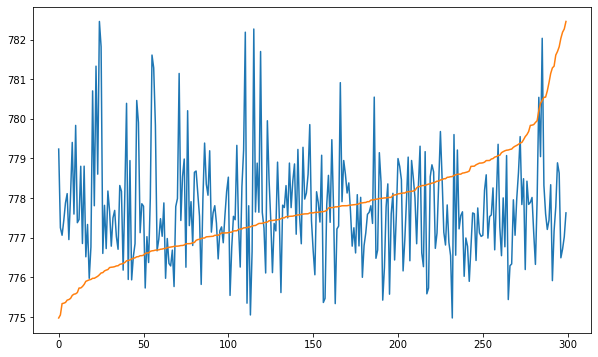

In [221]:
x = np.arange(N)
plt.figure(figsize=(10, 6))
plt.plot(x, feature_p)
plt.plot(x, np.sort(feature_p))

Set two cut-offs to divide points into 3 clusters

### 2D features for improved clustering accuracy

Theory:

$A \longleftrightarrow B \longleftrightarrow C$ 

Suppose $AB = 5, BC = 3$, then $AB+BC=8$. 

If $AB = 4, BC = 4$, we also get $AB+BC=8$.

However, if we also know $AB - BC$, we get:

$AB - BC =2$ in the first case,

$AB - BC =0$ in the second case,

Therefore we can tell the points apart.

Similarily, in our MD frames, if we alternate the sign of atom charges, we get a complementary feature to give us more information.


In [146]:
start_time = timeit.default_timer()

N = 300

feature_q = np.zeros(shape=(N))
for iframe in range(N):
    pts = np.loadtxt(frame_names[iframe], usecols=[6, 7, 8])[::10]
    U = 0.0
    n_pts = len(pts)
    for i_pts in range(n_pts-1):
        for j_pts in range(i_pts+1, n_pts):
            r_ij = np.linalg.norm(pts[i_pts]-pts[j_pts])
            U += 1/r_ij*(-1)**(i_pts+j_pts)
    feature_q[iframe] = U
    
elapsed = timeit.default_timer() - start_time
print("Elapsed time = %d seconds" %(elapsed))

Elapsed time = 103 seconds


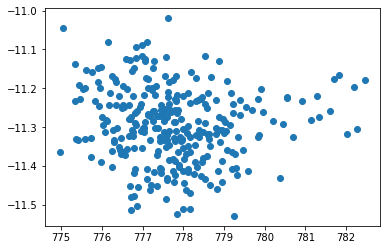

In [148]:
plt.scatter(feature_p, feature_q)

In [150]:
pts_2d = np.vstack((feature_p,feature_q)).T

kmeans = KMeans(n_clusters=3)
kmeans.fit(pts_2d)
y_kmeans = kmeans.predict(pts_2d)

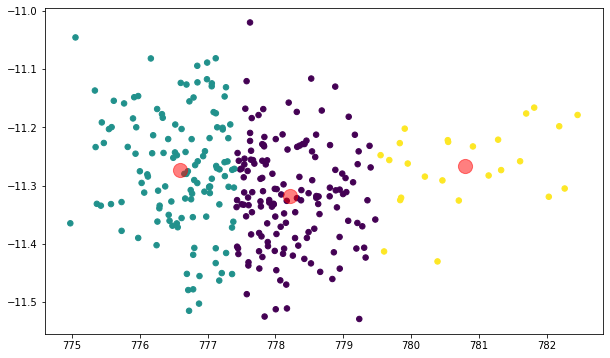

In [151]:
plt.figure(figsize=(10, 6))
plt.scatter(pts_2d[:, 0], pts_2d[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [153]:
print(centers)
print(y_kmeans)

[[778.20957407 -11.31707249]
 [776.59099596 -11.27288092]
 [780.79137213 -11.2655991 ]]
[0 1 1 0 0 0 1 0 0 0 2 1 0 0 1 0 1 1 1 1 2 0 2 0 2 2 1 0 1 0 0 1 0 0 1 1 0
 0 1 0 2 1 0 1 1 1 2 2 1 0 0 1 1 1 0 2 2 2 1 1 0 1 0 1 1 1 1 1 1 0 0 2 0 0
 0 1 2 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 2
 1 0 1 1 2 0 0 0 2 0 1 1 2 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 2 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 2 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 1 2 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 1 1 0 2 0 1 1 0 1 1 1 2 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 1 0 0 2 0 0 1 0 0 0 0 1 1 0 2 0 2 0 0 1 0 0 1 1 0 0 0
 1 1 1 0]


### Compare with hierachical clustering

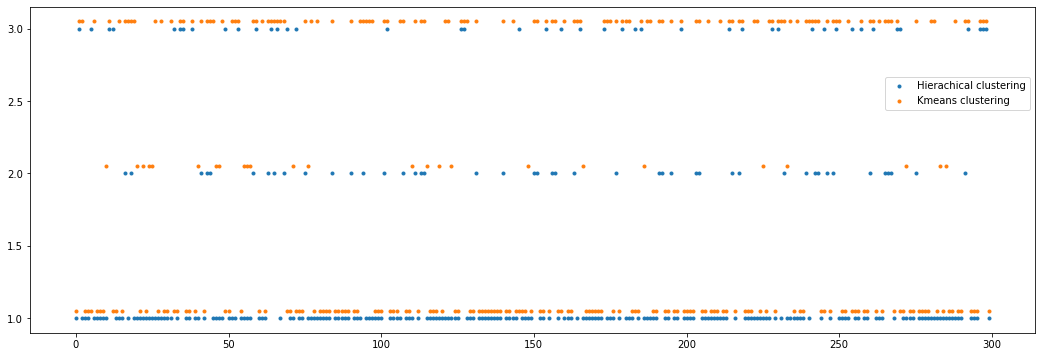

In [194]:
# convert cluster index to match hierachical clustering
Ctable = {1:3, 0:1, 2:2}
y_kmeans2 = np.zeros(shape=(N), dtype=int)
for ic in range(N):
    y_kmeans2[ic] = Ctable[y_kmeans[ic]]


match = clusters == y_kmeans2

plt.figure(figsize=(18, 6))
plt.scatter(np.arange(N),clusters, marker=".", label="Hierachical clustering")
plt.scatter(np.arange(N),y_kmeans2+0.05, marker=".", label="Kmeans clustering")
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.3, 0.5, 0.5))
plt.show()

In [168]:
print("Cluster 1:", list(y_kmeans2).count(1))
print("Cluster 2:", list(y_kmeans2).count(2))
print("Cluster 3:", list(y_kmeans2).count(3))

print("Matched:", list(match).count(True))

Cluster 1: 151
Cluster 2: 25
Cluster 3: 124
Matched: 170


### Time comparison (300 frames of CA atoms):

|Similarity measurement | Clustering method | Time | Scale up |
| --- | --- | --- | --- |
| RMSD matrix | Hierachical | 50 minutes | $n^2$ |
| Intrinsic signiture matrix | Hierachical | 240 minutes|  $n^2$ |
| 1D feature | Visual |2 minutes|$n$| 
| 2D features | Kmeans |4 minutes|$n$| 